0.9559119252928875
[50.92519565]
[[-1.37276087]]


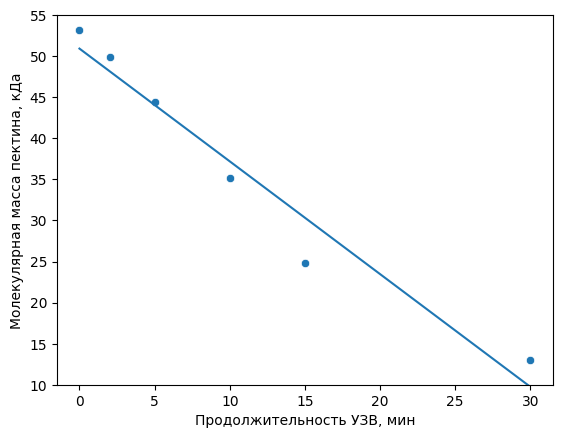

In [22]:
# регрессионный анализ. Зависимость молекулярной массы от продолжительности УЗВ

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = pd.DataFrame({'t': [0, 2, 5, 10, 15, 30]})
y = pd.DataFrame({'MM': [53.13, 49.96, 44.38, 35.12, 24.84, 13.01]})

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X).ravel()
X = X.to_numpy().ravel()
y = y.to_numpy().ravel()

print(r2_score(y, y_pred))
print(model.intercept_)
print(model.coef_)

sns.lineplot(x=X, y=y_pred)
sns.scatterplot(x=X, y=y)
plt.xlabel('Продолжительность УЗВ, мин')
plt.ylabel('Молекулярная масса пектина, кДа')
plt.ylim(10, 55)
plt.rc('font', family='Times New Roman', size=12)

In [ ]:
# дисперсионный анализ структурно-механических свойств образцов пектиновых пленок

import pandas as pd
from scipy.stats import f_oneway
from sklearn.ensemble import IsolationForest

data_K = pd.DataFrame({
    'thick':[0.077, 0.11, 0.0827, 0.0887, 0.0753],
    'ten_str':[4.68, 8.03, 4.71, 4.56, 5.91],
    'elong':[13.33, 30.00, 9.33, 8.23, 13.52],
    'mod_elast':[0.35, 0.27, 0.50, 0.55, 0.44]
})

data_4 = pd.DataFrame({
    'thick':[0.139, 0.061, 0.075, 0.112, 0.0793, 0.0627],
    'ten_str':[7.54, 7.54, 8.48, 5.72, 4.37, 7.54],
    'elong':[26.67, 23.33, 43.33, 20.0, 9.68, 15.07],
    'mod_elast':[0.28, 0.32, 0.20, 0.29, 0.45, 0.50]
})

data_5 = pd.DataFrame({
    'thick':[0.070, 0.0903, 0.2057, 0.0670, 0.06, 0.0767],
    'ten_str':[4.05, 1.73, 7.24, 6.39, 4.38, 2.47],
    'elong':[14.52, 14.52, 14.52, 23.33, 8.23, 12.00],
    'mod_elast':[0.34, 0.34, 0.34, 0.27, 0.53, 0.21]
})

K_pred = data_K.ten_str
d4_pred = data_4.ten_str
d5_pred = data_5.ten_str

f_statistic_pred, p_value_pred = f_oneway(d4_pred, d5_pred)

# print("F-статистика_pred:", f_statistic_pred)
# print("p-значение_pred:", p_value_pred)

clf_K = IsolationForest().fit(data_K)

data_K['anomaly'] = clf_K.predict(data_K)
data_K = data_K[data_K.anomaly == 1]
data_K = data_K.drop(columns='anomaly')
data_K

clf_4 = IsolationForest().fit(data_4)

data_4['anomaly'] = clf_4.predict(data_4)
data_4 = data_4[data_4.anomaly == 1]
data_4 = data_4.drop(columns='anomaly')
data_4

clf_5 = IsolationForest().fit(data_5)

data_5['anomaly'] = clf_5.predict(data_5)
data_5 = data_5[data_5.anomaly == 1]
data_5 = data_5.drop(columns='anomaly')
data_5

K = data_K.thick
d4 = data_4.thick
d5 = data_5.thick

f_statistic, p_value = f_oneway(K, d4)

print("F-статистика:", f_statistic)
print("p-значение:", p_value)

# print(f'{data_4}\n{data_5}')
# print(d4.mean(), d5.mean())

# print(K.mean(), K.std(), variance(K),'\n',
# d4.mean(), d4.std(), variance(d4),'\n'
# ,d5.mean(), d5.std(), variance(d5))

F-статистика: 0.430827433818877
p-значение: 0.5359293353848439
